<a href="https://colab.research.google.com/github/feliciakiani/PolitikPedia/blob/main/Machine%20Learning/Keyword_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import nltk

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cek .txt to Cek  (1).txt


In [ ]:
# Load the dataset
data = open('Cek .txt').read()

# Lowercase and split the text
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['partai politik', 'partai kebangkitan bangsa', 'kebangkitan bangsa', 'pkb', 'partai gerakan indonesia raya', 'gerakan indonesia raya', 'gerindra', 'partai demokrasi indonesia perjuangan ', 'pdip perjuangan', 'pdip ', 'partai golongan karya', 'golongan karya ', 'golkar', 'partai nasdem', 'nasdem', 'partai buruh', 'buruh ', 'partai gelombang rakyat indonesia ', 'gelombang rakyat indonesia', 'gelora', 'partai keadilan sejahtera', 'keadilan sejahtera', 'pks', 'partai kebangkitan nusantara', 'kebangkitan nusantara', 'pkn', 'partai hati nurani rakyat', 'hati nurani rakyat', 'hanura', 'partai garda perubahan indonesia ', 'garda perubahan indonesia', 'garuda', 'partai amanat nasional', 'amanat nasional ', 'pan', 'partai bulan bintang ', 'bulan bintang ', 'pbb', 'partai demokrat', 'demokrat', 'partai solidaritas indonesia ', 'solidaritas indonesia', 'psi', 'partai persatuan indonesia', 'persatuan indonesia', 'perindo', 'partai persatuan pembangunan ', 'persatuan pembangunan', 'ppp', 'partai um

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'partai': 1, 'indonesia': 2, 'ahmad': 3, 'kebangkitan': 4, 'rakyat': 5, 'persatuan': 6, 'bangsa': 7, 'gerakan': 8, 'raya': 9, 'perjuangan': 10, 'pdip': 11, 'golongan': 12, 'karya': 13, 'nasdem': 14, 'buruh': 15, 'gelombang': 16, 'keadilan': 17, 'sejahtera': 18, 'nusantara': 19, 'hati': 20, 'nurani': 21, 'garda': 22, 'perubahan': 23, 'amanat': 24, 'nasional': 25, 'bulan': 26, 'bintang': 27, 'demokrat': 28, 'solidaritas': 29, 'pembangunan': 30, 'ummat': 31, 'yudhoyono': 32, 'muhamad': 33, 'politik': 34, 'pkb': 35, 'gerindra': 36, 'demokrasi': 37, 'golkar': 38, 'gelora': 39, 'pks': 40, 'pkn': 41, 'hanura': 42, 'garuda': 43, 'pan': 44, 'pbb': 45, 'psi': 46, 'perindo': 47, 'ppp': 48, 'muhaimin': 49, 'iskandar': 50, 'hasanuddin': 51, 'wahid': 52, 'cucun': 53, 'syamsurijal': 54, 'prabowo': 55, 'subianto': 56, 'muzani': 57, 'megawati': 58, 'soekarnoputri': 59, 'hasto': 60, 'kristiyanto': 61, 'drs': 62, 'utut': 63, 'adianto': 64, 'airlangga': 65, 'hartarto': 66, 'lodewij

In [ ]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):

		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['partai', 'politik']
[1, 34]


In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [0 1 8]
decoded to text: ['partai gerakan']
one-hot label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 2


In [ ]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [0 0 1]
decoded to text: ['partai']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 8


In [ ]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 100)            14100     
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dense (Dense)               (None, 141)               42441     
                                                                 
Total params: 357741 (1.36 MB)
Trainable params: 357741 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs = 200

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/200
4/4 [==============================] - 0s 41ms/step - loss: 0.5925 - accuracy: 0.7478
Epoch 2/200
4/4 [==============================] - 0s 53ms/step - loss: 0.5920 - accuracy: 0.7826
Epoch 3/200
4/4 [==============================] - 0s 34ms/step - loss: 0.5878 - accuracy: 0.7826
Epoch 4/200
4/4 [==============================] - 0s 33ms/step - loss: 0.5894 - accuracy: 0.7739
Epoch 5/200
4/4 [==============================] - 0s 44ms/step - loss: 0.5883 - accuracy: 0.7478
Epoch 6/200
4/4 [==============================] - 0s 52ms/step - loss: 0.5877 - accuracy: 0.7652
Epoch 7/200
4/4 [==============================] - 0s 41ms/step - loss: 0.5831 - accuracy: 0.7739
Epoch 8/200
4/4 [==============================] - 0s 48ms/step - loss: 0.5894 - accuracy: 0.7565
Epoch 9/200
4/4 [==============================] - 0s 34ms/step - loss: 0.5863 - accuracy: 0.7826
Epoch 10/200
4/4 [==============================] - 0s 28ms/step - loss: 0.5908 - accuracy: 0.7826
Epoch 11/200
4/4 [=

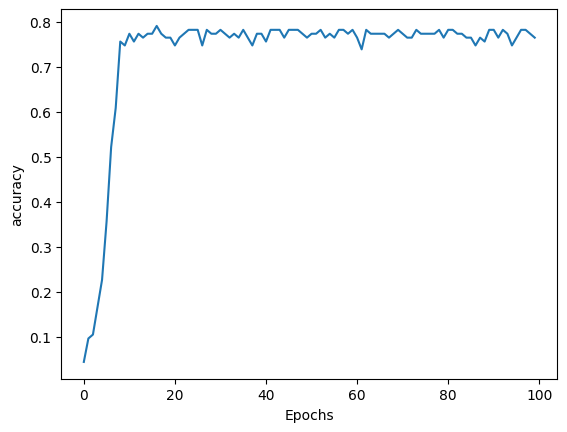

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [ ]:
# Define seed text
seed_text = "partai"

# Define total words to predict
next_words = 2

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list, verbose=0)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:

		# Look up the word associated with the index.
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result
print(seed_text)

partai kebangkitan nusantara


In [ ]:
# Define seed text
seed_text = "presiden"

# Define total words to predict
next_words = 3

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list, verbose=0)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])

  # Sort the probabilities in ascending order
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:

		# Look up the word associated with the index.
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result
print(seed_text)

presiden soeparno shah juli
